# **Algorithm and Data Mining for Data Science**



## **#2 Homework: Instagram Profiles & Posts**

### **[RQ1] = Exploratory Data Analysis**
What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [24]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####  Step 1: Importing Datasets

In [5]:
df_inst_loc= pd.read_csv('instagram_locations.csv', sep='\t')

In [3]:
df_inst_posts= pd.read_csv('instagram_posts.csv', sep='\t', chunksize=1000000)

In [25]:
df_inst_prof= pd.read_csv('instagram_profiles.csv', sep='\t')

#### Step 2: Understanding the big picture with Tabular Representation

In [6]:
df_inst_loc.head(5)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [7]:
for chunk in df_inst_posts:
    display(chunk.head())
    break

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


In [8]:
df_inst_prof.head(5)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [9]:
df_inst_loc.shape

(1022658, 23)

1022658 rows and 23 columns for instagram location dataset

In [11]:
sumChunks = 0
for count, chunk in enumerate(df_inst_posts,start=1):
    sumChunks = sumChunks + chunk.shape[0]
print(sumChunks)

41710197


41710197 rows and 10 columns for instagram posts dataset

In [12]:
df_inst_prof.shape

(4509586, 11)

###### 4509586 rows and 11 columns for instagram profiles dataset

In [13]:
df_inst_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [28]:
df_inst_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


In [42]:
#How many unique countries are present in the location dataset?
var = df_inst_loc.dir_country_name.nunique()
var_1 = str(var)
print('In the Location Dataset there are '+ var_1 + ' unique countries')

In the Location Dataset there are 235 unique countries


In [43]:
#How many unique profiles are present in the profiles dataset?
var = df_inst_prof.profile_name.nunique()
var_2= str(var)
print(('In the Profile Dataset there are '+ var_2 + ' unique profiles'))

In the Profile Dataset there are 4508180 unique profiles


#### Step 3: Visual Analytics

In [47]:
df_inst_prof.select_dtypes(include = ['float64']).head() #select only numeric columns 

,profile_id,following,followers,n_posts
0,4.721050e+09,250.0,146.0,170.0
1,5.905830e+08,534.0,1145.0,2878.0
2,1.074147e+09,469.0,324.0,431.0
3,1.472039e+09,NaN,NaN,NaN
4,3.531421e+09,NaN,NaN,NaN


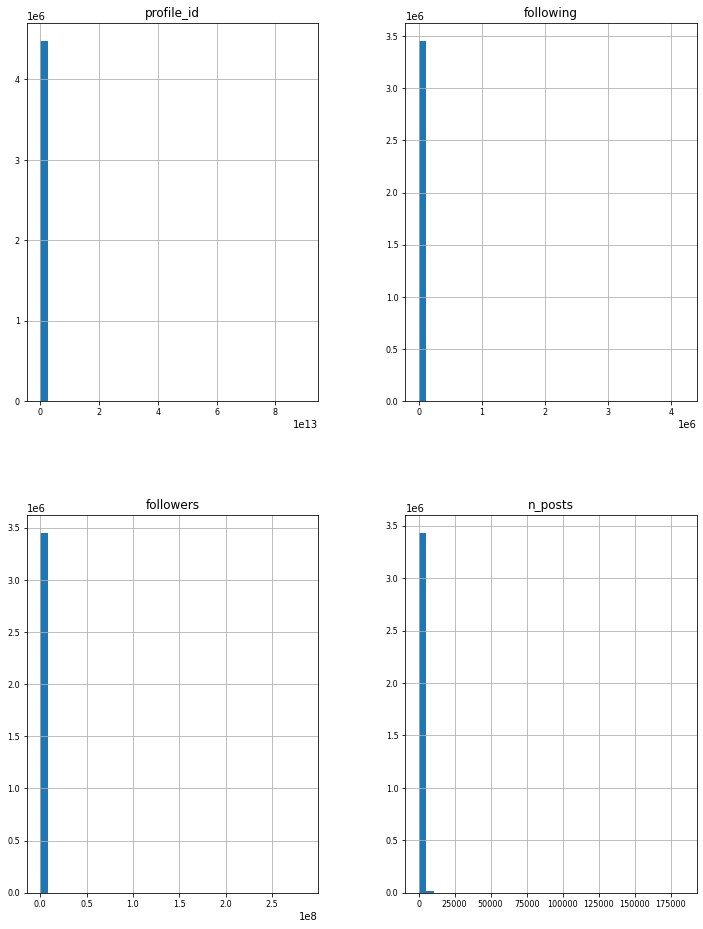

In [59]:
df_inst_prof.select_dtypes(include = ['float64']).hist(figsize=(12, 16), bins=35, xlabelsize=8, ylabelsize=8) # plot histograms of numeric columns
plt.show()

Poor data variability except for n_posts with a little variability

## [RQ2] = Simple Insights
#### Explore the dataset by finding simple insights regarding the profile and posts.

##### Plot the number of posts for each profile in descending order.

In [19]:
df_inst_prof.groupby(["profile_id"], dropna=True)['n_posts'].sum()
df_inst_prof.sort_values(by='n_posts', ascending = False)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...
4509575,4184448,2.438073e+08,not_omeed,أوميد,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:06.271 -0400,NaN
4509577,4184452,6.567796e+08,shak._n5,Shakil Hussain,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:23.911 -0400,NaN
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN


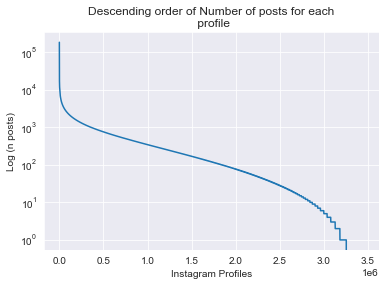

In [5]:
n_posts = df_inst_prof.n_posts.dropna()

plt.plot(np.sort(n_posts)[::-1]);
plt.title('Descending order of Number of posts for each\n profile')
plt.ylabel('Log (n posts)')
plt.xlabel('Instagram Profiles')
plt.yscale('log')

In [2]:
post_analysis= pd.read_csv('instagram_posts.csv', sep="\t",  usecols=['numbr_likes','number_comments'])

##### What posts have the highest number of likes?

In [3]:
post_analysis['numbr_likes'].sort_values(ascending=False).head(15)

19624085    8822952.0
19623988    5447066.0
19624082    5116398.0
19623986    4271466.0
39701024    4264745.0
6293907     3586546.0
19624086    3558599.0
19802016    3533326.0
30850564    3340297.0
39812576    3311246.0
17474533    3201436.0
19624088    3198242.0
37248165    3091301.0
30568676    2973661.0
19623987    2900455.0
Name: numbr_likes, dtype: float64

Note!
On the left the n. of the row, on the left the n. of likes

##### What posts have the most and the highest number of comments?

In [4]:
post_analysis['number_comments'].sort_values(ascending=False).head(15)

41873060    488953.0
12164781    313997.0
33261751    257488.0
11149127    214365.0
9383817     189888.0
5427268     180635.0
25257169    173988.0
6220011     170836.0
31689573    166919.0
14257307    166198.0
19624085    165886.0
30850564    149489.0
27276611    146770.0
11149135    145806.0
28934415    143614.0
Name: number_comments, dtype: float64

##### What posts have the most and the least number of comments?

In [5]:
post_analysis['number_comments'].sort_values(ascending=True).head(15)

0           0.0
13108581    0.0
13108584    0.0
13108585    0.0
13108586    0.0
13108587    0.0
13108588    0.0
13108589    0.0
13108590    0.0
13108591    0.0
13108593    0.0
13108594    0.0
13108596    0.0
13108597    0.0
13108580    0.0
Name: number_comments, dtype: float64

##### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

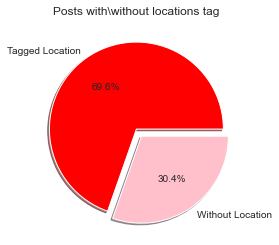

In [9]:
tag_loc = 0
no_loc = 0

for chunk in pd.read_csv('instagram_posts.csv', sep='\t', chunksize=500000, usecols=['location_id']):
    no_loc += chunk.location_id.isna().sum()
    tag_loc += len(chunk)                           # Using chunks we just count the missing values in location_id column


plt.pie([tag_loc - no_loc, no_loc], labels=['Tagged Location', 'Without Location'], shadow=True, explode=(0, .1), autopct='%1.1f%%', colors = ['red', 'pink'])
plt.title('Posts with\without locations tag')
plt.show()

The pie chart clearly tells us that the majority of posts in our dataset have tagged location (69,6%), while still a great portion of 30,4% isn't localized.

##### How many posts include only photos? How many also have videos?

In [6]:
post_analysis_1= pd.read_csv('instagram_posts.csv', sep="\t",  usecols=['post_type'])
photos = post_analysis_1.loc[post_analysis_1['post_type'] == 1, 'post_type'].sum()
video_photos = post_analysis_1.loc[post_analysis_1['post_type'] > 1, 'post_type'].sum()

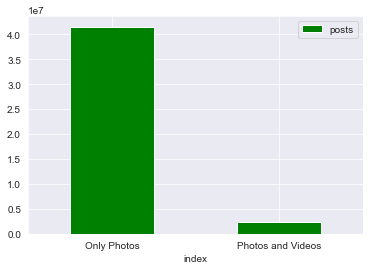

In [7]:
df = pd.DataFrame({'posts': [photos, video_photos],
                   'index': ['Only Photos', 'Photos and Videos']})

plot = df.plot.bar(x='index', y='posts', rot=0, color= 'green')

In [12]:
profiles = df_inst_prof[['is_business_account','profile_name']]

Business =len(profiles[profiles['is_business_account'] == True])

#count how many NOT business account
Not_business = len(df_inst_prof[df_inst_prof['is_business_account'] == False])

total_account = Business + Not_business
yes_perc='{:.1%}'.format(Business/total_account)
no_perc='{:.1%}'.format(Not_business/total_account)
print('Percentage of business accounts in the dataset is equal to '+ yes_perc)
print('Percentage of non business accounts in the dataset is equal to '+ no_perc)

Percentage of business accounts in the dataset is equal to 24.8%
Percentage of non business accounts in the dataset is equal to 75.2%


The majority of users in this dataset are using Instangram for personal entertainment rather than as source of profit

## [RQ3] = Most common publishing time
#### Understand the most common times in which users publish their posts

##### What is the most common time in which users publish their posts?

In [26]:
post_cts_analysis = pd.read_csv('instagram_posts.csv', sep="\t",  usecols=['profile_id','cts',"number_comments","numbr_likes", "post_type"])

In [12]:
time_mode = pd.to_datetime(post_cts_analysis['cts']).dt.strftime('%H:%M:%S').mode() # get requested time format 

print('Users usually publish their posts at {}'.format(time_mode[0]))

Users usually publish their posts at 21:00:09


##### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [35]:
def plot_intervals(data, time_intervals):
    time = pd.DataFrame(pd.to_datetime(data.cts))
    time.set_index(pd.DatetimeIndex(time.cts), inplace=True)
    calculation = 0
    values = pd.DataFrame()
    for interval in time_intervals:
        initial_time, final_time = interval
        tot = time.between_time(initial_time, final_time).count()
        tot = int(tot[0])
        print([interval],tot)
        result = pd.DataFrame({'time interval (start, end)' : [interval], 'total posts' : tot})
        values = values.append(result)
        calculation += tot
    sns.set()

    ax = values.plot(figsize=(14,8), kind='bar', color = 'red', zorder=3)
    a = range(0, 6)
    plt.xticks(a, time_intervals, rotation = 30)
    plt.xlabel("Time Intervals", fontsize=14, labelpad=20)
    plt.ylabel("N of posts", fontsize=14, labelpad=20)
    plt.title("Number of posts for each time interval", fontsize=18)
    plt.show()

In [30]:
timing= [('06:00:00', '10:59:59'),('11:00:00', '13:59:59'),
         ('14:00:00', '16:59:59'), ('17:00:00', '19:59:59'),
         ('20:00:00', '23:59:59'), ('00:00:00', '02:59:59'), ('03:00:00','05:59:59')]

[('06:00:00', '10:59:59')] 6378572
[('11:00:00', '13:59:59')] 5614715
[('14:00:00', '16:59:59')] 6763037
[('17:00:00', '19:59:59')] 7409907
[('20:00:00', '23:59:59')] 8915794
[('00:00:00', '02:59:59')] 4213617
[('03:00:00', '05:59:59')] 3411223


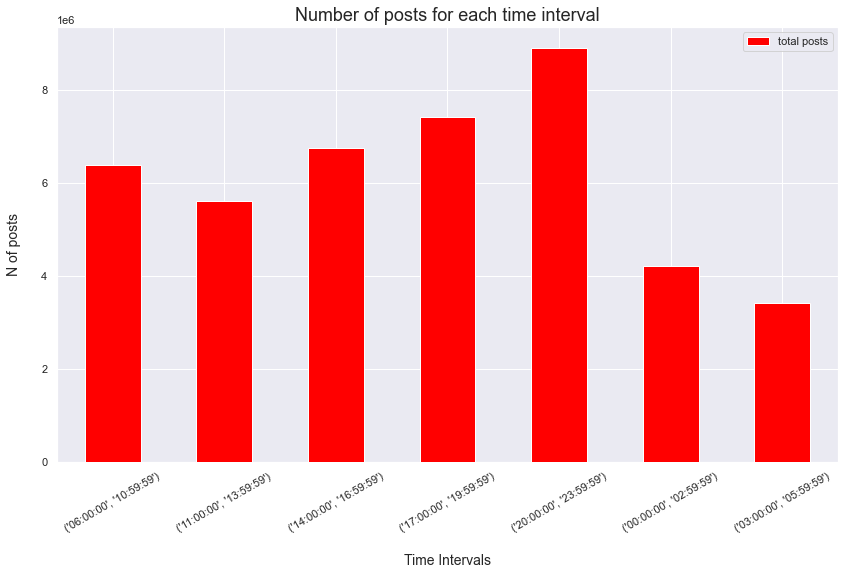

In [35]:
plot_intervals(post_cts_analysis, timing)

Posts are mainly published on Instagram between 20:00 and Midnight time interval.

## [RQ4] = Analysis Enhancement

##### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [4]:
def get_post(profile_id,posts_df):
    return posts_df[posts_df.profile_id == profile_id]

##### Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [5]:
def posts_top_profiles(n,posts_df,profile_df):
    top_posted_profiles = profile_df.sort_values('n_posts',ascending=False).profile_id.head(n+1)
    output_posts = []
    for id in top_posted_profiles:
        output_posts.append(get_post(id,posts_df))
    result = pd.concat(output_posts)
    return result

In [27]:
top_posted = df_inst_prof.sort_values('n_posts',ascending=False).profile_id.head(11)
display(posts_top_profiles(10,post_cts_analysis,df_inst_prof))

,profile_id,cts,numbr_likes,number_comments
9592952,1.996648e+08,2018-12-02 03:03:33.000,0.0,0.0
9592953,1.996648e+08,2018-12-02 03:03:17.000,0.0,0.0
9592954,1.996648e+08,2016-03-07 16:28:50.000,27.0,0.0
9592955,1.996648e+08,2015-05-18 11:21:27.000,28.0,0.0
9592956,1.996648e+08,2018-12-09 13:33:47.000,1.0,0.0
...,...,...,...,...
40437904,1.701679e+09,2019-05-11 08:03:24.000,0.0,0.0
40996459,1.701679e+09,2019-05-23 06:41:49.000,1.0,0.0
41291564,1.701679e+09,2019-05-20 07:51:12.000,1.0,0.0
42357392,1.701679e+09,2019-05-22 08:54:51.000,1.0,0.0


##### What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [30]:
posts_top_profiles(10,post_cts_analysis,df_inst_prof).groupby("profile_id")[['numbr_likes','number_comments']].mean()

,numbr_likes,number_comments
profile_id,,
9.813508e+06,0.296296,0.000000
1.996648e+08,7.666667,0.000000
2.181730e+08,0.400000,0.040000
2.855497e+08,3.921875,0.000000
1.087614e+09,2.026316,0.184211
1.273455e+09,2.960000,0.040000
1.603890e+09,6.477612,0.044776
1.607309e+09,1.540541,0.000000
1.701679e+09,1.447368,0.000000


##### Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart. List with cts and posts of the top 10 profiles

In [27]:
import warnings
warnings.filterwarnings("ignore")
t_n = pd.DataFrame(df_inst_prof.loc[:,["profile_id","n_posts"]])
t_n.fillna(0,inplace= True)
d = t_n.sort_values("n_posts",ascending = False)
T10 = d.head(11)
T10=T10.drop(["n_posts"],axis=1)
listofT10 = pd.DataFrame(columns = ["profile_id","cts"])
new_df= pd.read_csv('instagram_posts.csv',sep = "\t",chunksize= 500000,usecols=["profile_id","post_id","cts"])
for chunk in new_df:
    chunk_in_common = pd.merge(chunk,T10)
    listofT10 = pd.concat([listofT10,chunk_in_common])
listofT10

,profile_id,cts,post_id
0,1701679225,2019-05-21 06:31:43.000,BxthV3ShVom
1,1701679225,2019-05-28 11:36:35.000,ByAFy4jhV31
2,1701679225,2019-05-21 05:27:11.000,BxtZ9NQhF5Q
3,1701679225,2019-05-18 12:35:53.000,Bxmcoaxh-2v
4,1607309412,2019-05-28 11:36:28.000,ByAFx7gnNhZ
...,...,...,...
1,1603889832,2019-05-21 08:59:01.000,BxtyMobBsXy
2,1603889832,2019-04-23 06:55:01.000,Bwldv-OhvYh
3,1701679225,2019-05-22 08:54:51.000,BxwWhDXh9-v
0,1701679225.0,2019-04-07 17:45:34.000,Bv9bevBhRyb


[('06:00:00', '10:59:59')] 139
[('11:00:00', '13:59:59')] 44
[('14:00:00', '16:59:59')] 55
[('17:00:00', '19:59:59')] 36
[('20:00:00', '23:59:59')] 22
[('00:00:00', '02:59:59')] 33
[('03:00:00', '05:59:59')] 103


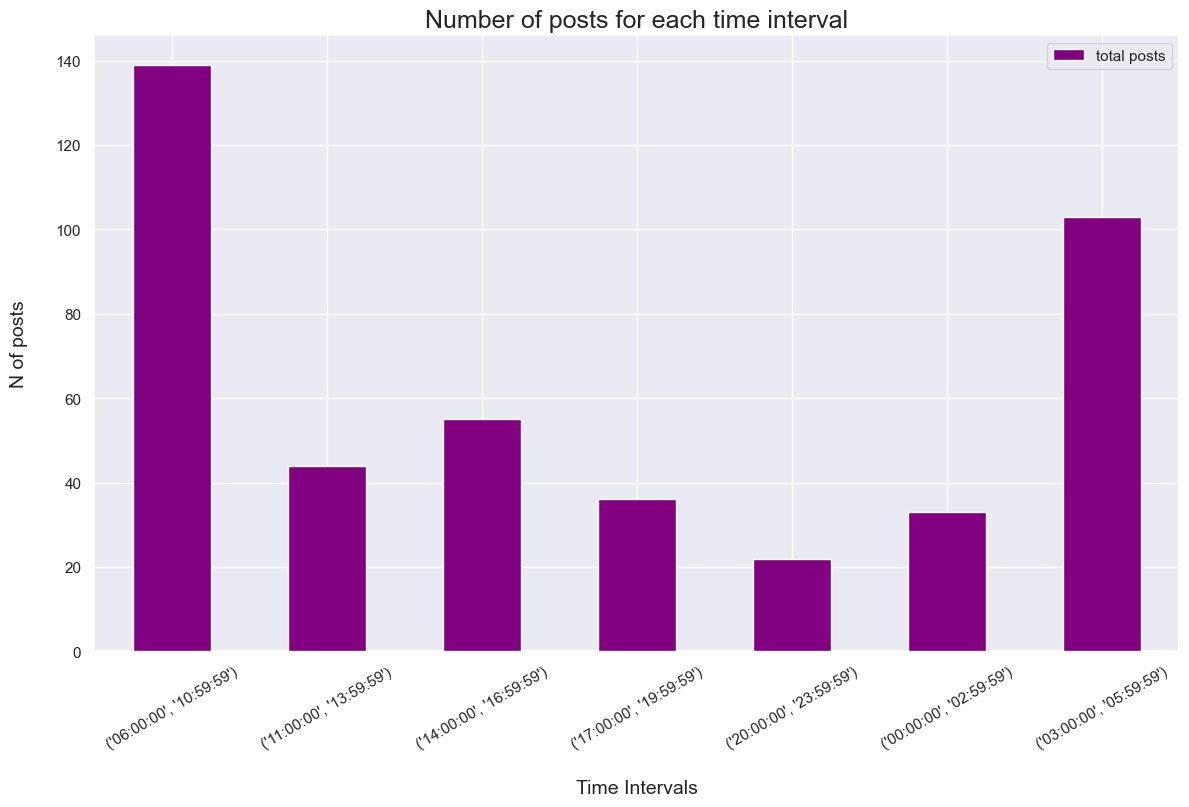

In [36]:
plot_intervals(listofT10, timing)

# [RQ5] = The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

##### Plot the top 10 most popular users in terms of followers and their number of posts.

In [4]:
topUsers= df_inst_prof[['profile_id', 'profile_name', 'followers', 'n_posts']].nlargest(10, 'followers')
topUsers

,profile_id,profile_name,followers,n_posts
2880218,2.502532e+07,instagram,285457645.0,5760.0
2582507,3.416684e+06,victoriassecret,65269440.0,7355.0
3820939,2.082449e+07,nba,35339708.0,28816.0
701965,1.876191e+08,louisvuitton,30689316.0,3352.0
2414951,2.125507e+09,buzzfeedtasty,30246783.0,2791.0
2785241,4.968651e+08,andresiniesta8,29542143.0,990.0
333193,2.341008e+07,hm,29176804.0,4566.0
3934581,2.423993e+07,princessyahrini,29042823.0,4719.0
1311970,5.041706e+07,danbilzerian,26476004.0,1311.0
1703764,9.070254e+08,akshaykumar,26252169.0,1173.0


##### Who is the most influential user?

<AxesSubplot:xlabel='profile_name'>

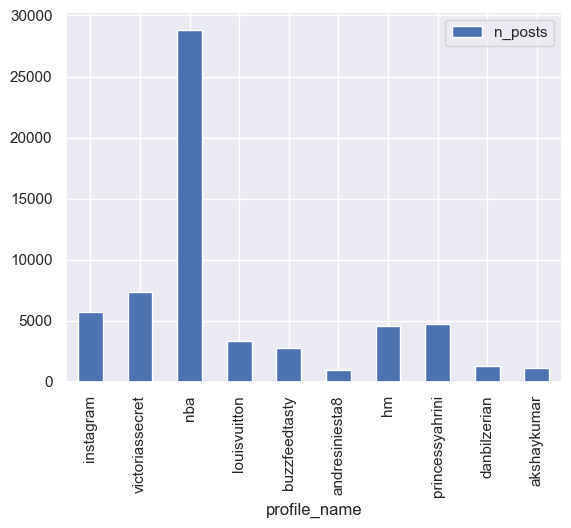

In [46]:
topUsers.plot(kind = "bar",x = "profile_name", y = "n_posts")

Instangram is the profile with the biggest number of followers (285.457.645), but it's not the one with the most published posts. Nba prevails in n_posts over the top 10 profiles.

##### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

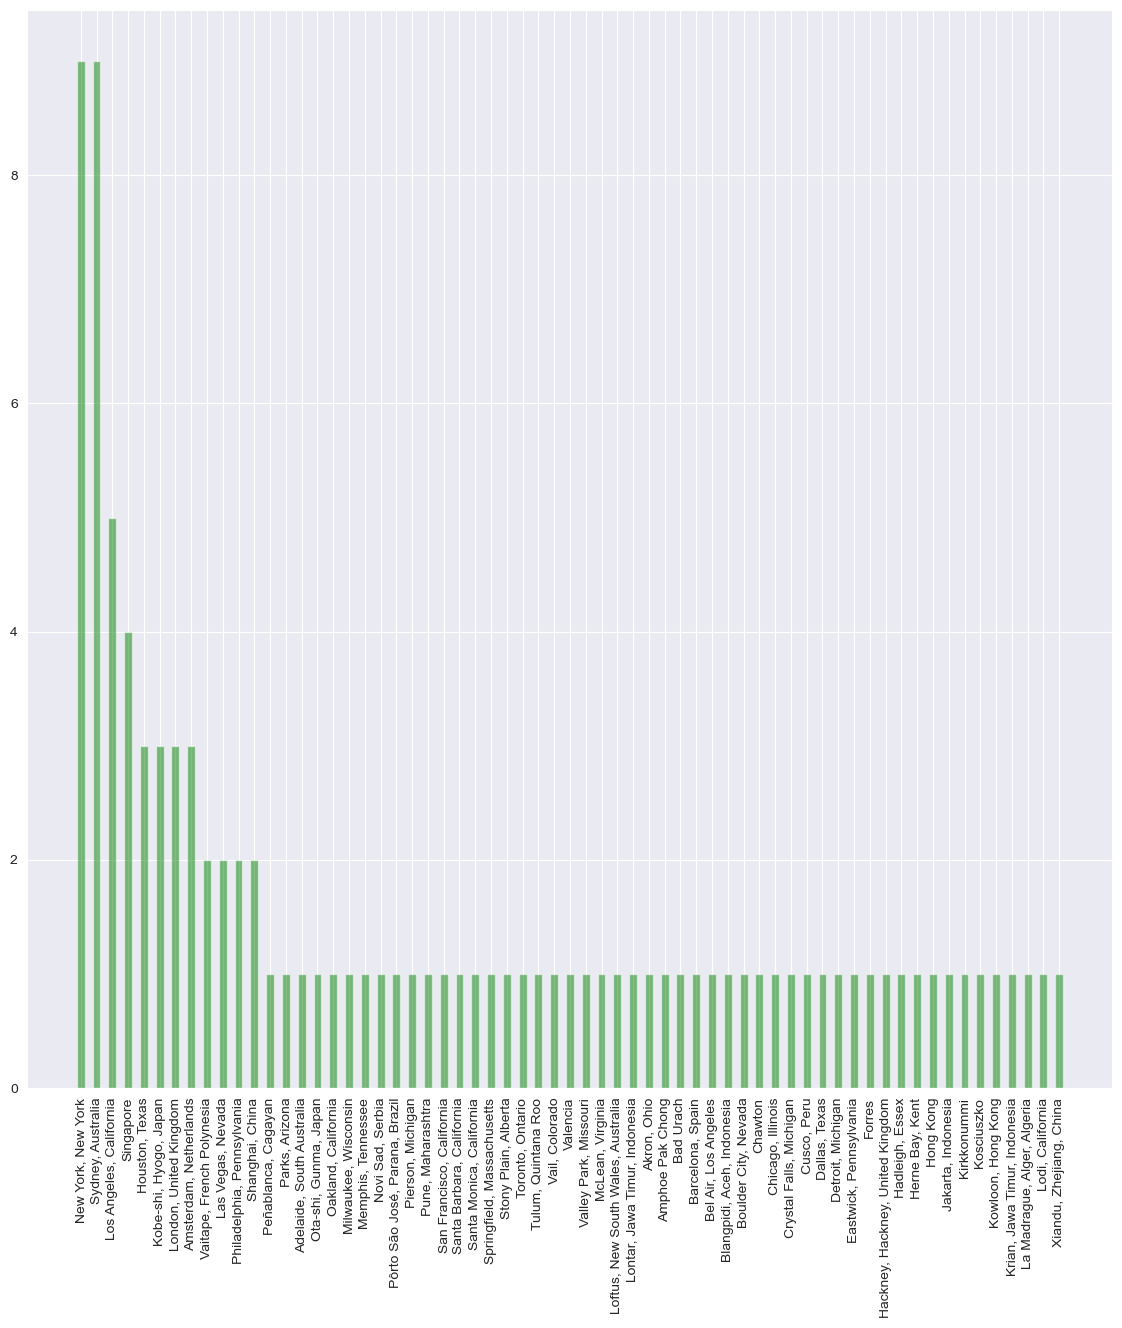

In [13]:
#Merge the 2 datasets on profile_id
dataframe= pd.read_csv('instagram_posts.csv', sep='\t',usecols=["profile_id","post_id","location_id"])
data=pd.merge(dataframe,topUsers, on='profile_id')
data=data[['location_id','post_id','profile_id']]

#Rename the columns from "location_id" to "id"
data.rename(columns={'location_id':'id'},inplace=True)

#Merge df and locations on the key: "id" and drop untagged locations in col city
last_df=pd.merge(data,df_inst_loc,on='id')
last_df= last_df.dropna(how='any', subset = ['city'])

#Let's do a group by "city" and count every occurrence
final_locations=last_df[['post_id','city']].groupby('city').count()

#Sort values by "post_id"
new_df_locations= final_locations.sort_values(by='post_id',ascending=False)
#Plotting
plt.figure(figsize=(14, 14))
ax1=plt.bar(new_df_locations.index,new_df_locations.post_id,width=0.5, alpha=0.5, color='green')
plt.xticks(new_df_locations.index, new_df_locations.index, rotation='vertical')

plt.show()

##### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [28]:
def post_top_profiles(n):
    df_inst_prof.groupby(["profile_id"], dropna=True)['n_posts'].sum()
    n_top_profiles = df_inst_prof.sort_values(by='followers', ascending = False).head(n)
    filter_list = n_top_profiles['profile_id']
    return post_cts_analysis[post_cts_analysis['profile_id'].isin(filter_list)]

posts_n_top_prof = post_top_profiles(10)
posts_top_profiles = posts_n_top_prof[posts_n_top_prof['profile_id'].isin(topUsers['profile_id'])]
only_photo = posts_top_profiles[posts_top_profiles.post_type == 1]
reels = posts_top_profiles[posts_top_profiles.post_type == 2]
mix = posts_top_profiles[posts_top_profiles.post_type == 3]

print("% of photo posts: {}%".format(round(len(only_photo.index)/len(posts_top_profiles.index),3)*100))
print("% of reels posts: {}%".format(round(len(reels.index)/len(posts_top_profiles.index),3)*100))
print("% of mixed posts: {}%".format(round(len(mix.index)/len(posts_top_profiles.index),3)*100))

% of photo posts: 90.8%
% of reels posts: 9.2%
% of mixed posts: 0.0%


##### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [30]:
likes_p = int(np.average(only_photo.numbr_likes))
comments_p = int(np.average(only_photo.number_comments))
print("average likes and comments of photos posts: {} / {}".format(likes_p,comments_p))

average likes and comments of photos posts: 541294 / 3882


In [31]:
likes_r = int(np.average(reels.numbr_likes))
comments_r = int(np.average(reels.number_comments))
print("average likes and comments of reels posts: {} / {}".format(likes_r,comments_r))

average likes and comments of reels posts: 266524 / 2019


In [32]:
likes_mix = int(np.average(mix.numbr_likes if mix.size != 0 else 0))
comments_mix = int(np.average(mix.number_comments if mix.size != 0 else 0))

profile_followers = int(np.average(topUsers.followers))

print("average likes and comments of multi posts: {} / {}".format(likes_mix,comments_mix))
print("average number of followers: {}".format(profile_followers))

average likes and comments of multi posts: 0 / 0
average number of followers: 58749283


# [RQ6] = User posting effectiveness.

##### What is the average time (days and minutes) a user lets pass before publishing another post?

In [38]:
df_r6 = pd.merge(post_cts_analysis, df_inst_prof, how = 'outer')
df_inst_prof = df_inst_prof[df_inst_prof.profile_id.isin(post_cts_analysis.profile_id.unique())]
post_cts_analysis = post_cts_analysis[post_cts_analysis.profile_id.isin(df_inst_prof.profile_id)]
post_cts_analysis = post_cts_analysis.dropna()
dfr6_grouped = post_cts_analysis.groupby("profile_id").aggregate({'cts':["max", "min", "count"]})
dfr6_grouped

cts                               
                                  max                      min count
profile_id                                                          
4.000000e+00  2019-05-05 08:03:36.000  2010-07-22 12:19:51.000    37
1.900000e+01  2019-04-17 07:44:13.000  2010-10-23 18:48:33.000    51
2.800000e+01  2019-04-16 05:10:12.000  2011-02-19 20:16:29.000    92
3.300000e+01  2013-03-30 22:35:38.000  2011-04-30 06:13:46.000     2
3.400000e+01  2019-07-01 20:49:50.000  2011-07-29 06:24:16.000    20
...                               ...                      ...   ...
1.499738e+10  2019-07-11 04:25:20.000  2019-07-09 03:18:33.000    12
1.501918e+10  2019-07-21 14:05:34.000  2019-06-19 13:17:00.000     5
1.523330e+10  2019-06-27 00:11:09.000  2019-06-26 23:56:47.000     3
1.566695e+10  2019-08-06 01:01:31.000  2019-07-29 21:36:32.000    11
9.001013e+13  2018-04-04 09:53:28.000  2017-06-22 10:56:54.000    10

[2173843 rows x 3 columns]

cts                               
                                  max                      min count
profile_id                                                          
4.000000e+00  2019-05-05 08:03:36.000  2010-07-22 12:19:51.000    37
1.900000e+01  2019-04-17 07:44:13.000  2010-10-23 18:48:33.000    51
2.800000e+01  2019-04-16 05:10:12.000  2011-02-19 20:16:29.000    92
3.300000e+01  2013-03-30 22:35:38.000  2011-04-30 06:13:46.000     2
3.400000e+01  2019-07-01 20:49:50.000  2011-07-29 06:24:16.000    20
...                               ...                      ...   ...
1.499738e+10  2019-07-11 04:25:20.000  2019-07-09 03:18:33.000    12
1.501918e+10  2019-07-21 14:05:34.000  2019-06-19 13:17:00.000     5
1.523330e+10  2019-06-27 00:11:09.000  2019-06-26 23:56:47.000     3
1.566695e+10  2019-08-06 01:01:31.000  2019-07-29 21:36:32.000    11
9.001013e+13  2018-04-04 09:53:28.000  2017-06-22 10:56:54.000    10

[2173843 rows x 3 columns]

In [39]:
xy= pd.to_datetime(dfr6_grouped.cts['max'], format='%Y-%m-%d %H:%M:%S')
yz= pd.to_datetime(dfr6_grouped.cts['min'], format='%Y-%m-%d %H:%M:%S')

In [40]:
dfr6_grouped["averagetime"] = (xy - yz) / (dfr6_grouped.cts['count']-1).astype(int)
averagetime = dfr6_grouped["averagetime"].mean()
avrg= str(averagetime)
print('The average time a user lets pass before publishing another post is '+ avrg)

The average time a user lets pass before publishing another post is 30 days 02:07:32.203146454


##### Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [54]:
dfr6_grouped["averagetime"].dropna
average = dfr6_grouped.nsmallest(3, ['averagetime'])
average

cts                                 \
                                  max                      min count   
profile_id                                                             
8.801686e+06  2018-09-09 02:19:42.000  2018-09-09 02:19:42.000     2   
1.823732e+09  2017-09-24 15:06:46.000  2017-09-24 15:06:46.000     2   
5.556785e+09  2017-06-05 01:40:35.000  2017-06-05 01:40:35.000     2   

             averagetime  
                          
profile_id                
8.801686e+06      0 days  
1.823732e+09      0 days  
5.556785e+09      0 days

In [59]:
top3 = pd.merge(average, df_inst_prof, on='profile_id')
top3

,profile_id,"(cts, max)","(cts, min)","(cts, count)","(averagetime, )",sid,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,8.801686e+06,2018-09-09 02:19:42.000,2018-09-09 02:19:42.000,2,0 days,156474,alex_dinsdale,Alex Dinsdale,NaN,1572.0,705.0,1590.0,NaN,2018-05-31 18:48:47.766 -0400,False
1,1.823732e+09,2017-09-24 15:06:46.000,2017-09-24 15:06:46.000,2,0 days,661124,twine_9,BAR 9,NaN,1009.0,30.0,2.0,NaN,2019-03-24 05:54:10.360 -0400,False
2,5.556785e+09,2017-06-05 01:40:35.000,2017-06-05 01:40:35.000,2,0 days,1025385,garrison_marilyn,Marilyn Scott Garrison,NaN,17.0,26.0,2.0,NaN,2019-03-30 08:01:28.207 -0400,False


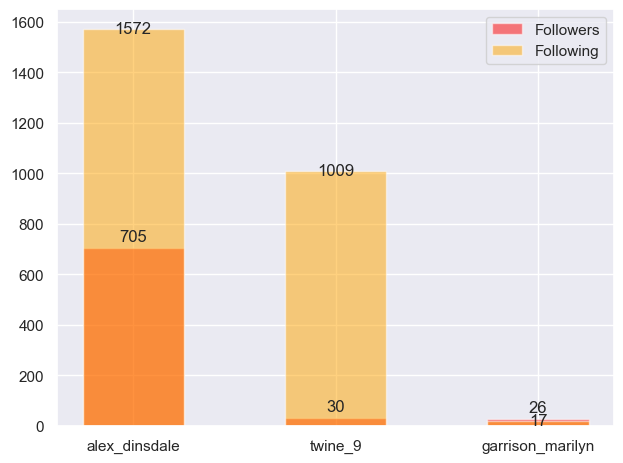

In [79]:
labels = top3['profile_name']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
followers = ax.bar(top3['profile_name'], top3['followers'], width=0.5, alpha=0.5, label='Followers', color='red')
following = ax.bar(top3['profile_name'], top3['following'], width=0.5, alpha=0.5, label='Following', color='orange')
ax.legend()

ax.bar_label(followers, padding=3)
ax.bar_label(following, padding=-5)

fig.tight_layout()

plt.show()

# [RQ7] = Probability Calculation

##### What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [102]:
profiles = df_inst_prof[["profile_id", "followers"]]
merge = pd.merge(profiles.dropna(), post_cts_analysis.dropna(), on='profile_id').dropna(subset = ["followers","numbr_likes"])

In [107]:
df7 = merge[merge['numbr_likes'] > (merge['followers'])*0.2]
probability = len(df7.index)/len(merge.index)*100
print('\nThe probability is: ' + str(probability) +' %')


The probability is: 15.716325833178058 %


##### Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [109]:
locs = pd.read_csv('instagram_posts.csv', sep="\t",  usecols=["profile_id", "location_id"])
loc_uniq = locs.drop_duplicates(keep='first')
revisiting = (len(locs) - len(loc_uniq))/len(locs)
revisiting

0.46023983452944506

For me it makes sense because people usually tend to post about new unvisited locations, the rest is posted for enjoyment from their living locations.

# [RQ8] = Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

##### Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts

<AxesSubplot:xlabel='numbr_likes', ylabel='number_comments'>

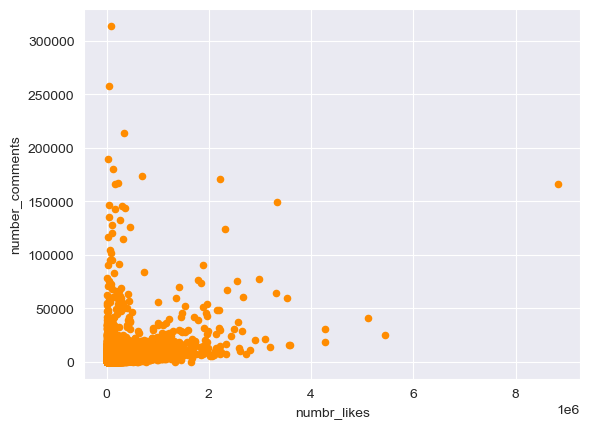

In [111]:
post_cts_analysis.plot.scatter(x='numbr_likes',y='number_comments',color='darkorange')

Looking at the scatter plot, it does not seem that more comments also mean more likes.

##### Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

In [114]:
correlation = post_cts_analysis[["cts", "numbr_likes", "number_comments"]]

#Takes only the date_time column and extrapolate only hours
correlation['cts'] = pd.to_datetime(correlation['cts'], unit='ns').dt.hour
correlation.corr()

,cts,numbr_likes,number_comments
cts,1.000000,0.001842,0.001002
numbr_likes,0.001842,1.000000,0.409439
number_comments,0.001002,0.409439,1.000000


Likes and Comments are nearly positive correlated with a Pearson coeff of 0.40. Pearson range oscillates between -1 (max negative correlation) and +1 (max positive correlation). The correlation between likes and cts (0.0018) and comments and cts (0.0010) they are non-correlated. From previous analysis it seems that in some intervals between 20:00 and 00:00 of the day users tend to be way more active looking at of likes and comments increasing.

##### What are histograms, bar plots, scatterplots and pie charts used for?

* Histogram : is a graph which represents the frequency distribution of a few data points of one variable. Histograms classify data into various “bins” or “range groups” and count how many data points belong to each of those bins. Histograms are used with continuous data.
* Bar Plots : show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages. Bar charts are used with categorical or nominal data.
* Scatterplots : is widely known as a correlation chart. It’s one of the best tools used for determining the relationship between two variables. Ideally, one variable is plotted on the horizontal axis, while the other variable is plotted on the vertical axis.The point of intersection pretty much shows the relationship pattern. Often, the scatter diagram is used to affirm or disprove the cause-and-effect relationship between two variables.
* Pie Charts : is a graph that displays the data in a circular format. It is a type of pictorial representation of data that shows the relative sizes of the slices of pie. It requires both categorical and numerical variables for a Pie Chart to work.

##### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [13]:
prof= df_inst_prof.dropna()
print(prof.followers.describe().to_markdown())

|       |        followers |
|:------|-----------------:|
| count | 746064           |
| mean  |  11269.6         |
| std   | 155359           |
| min   |      0           |
| 25%   |    427           |
| 50%   |    999           |
| 75%   |   2746           |
| max   |      2.95421e+07 |


In [7]:
print('Mode = ', prof.followers.mode())

Mode =  0    228.0
Name: followers, dtype: float64


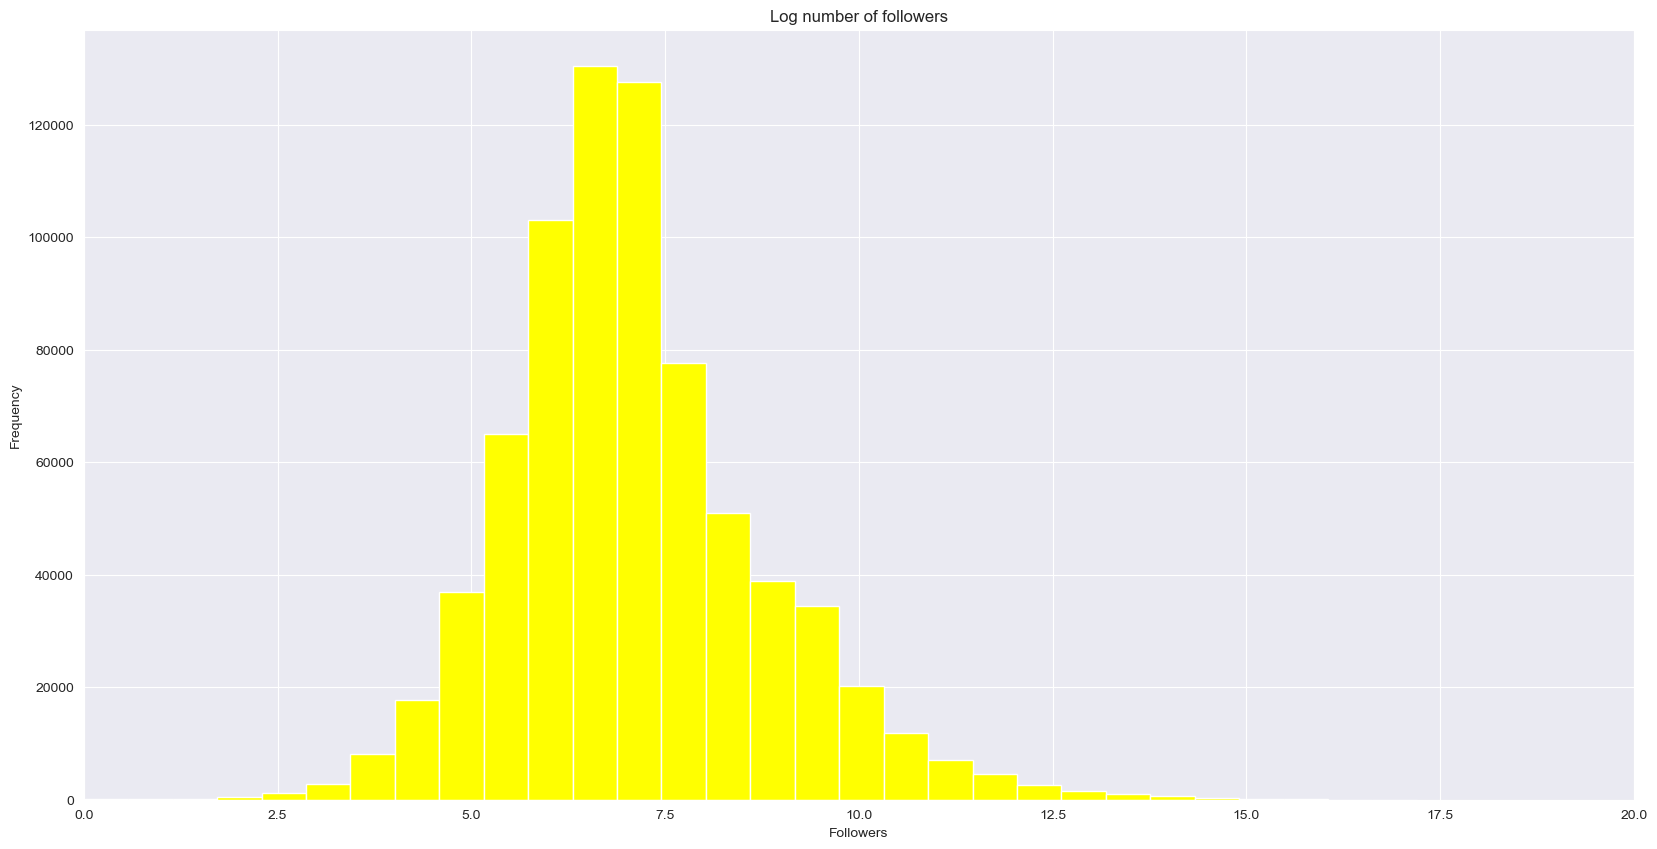

In [12]:
plt.figure(figsize=(20, 10))
plt.title("Log number of followers")
plt.xlabel("Followers")
plt.ylabel("Frequency")
plt.hist((prof.followers+1).apply(np.log), bins=30, color="yellow")
plt.xlim(0, 20)
plt.show()

 The curve of the data is clustered on the left, meaning that most of the population has a small amount of followers supported also by the value of the mode which underlines also hte fact that there are a lot of profiles with no followers at all. A few profiles instead has the biggest number of the followers, the ones that were defined as influencers.

##### What insights can you extract from a Box Plot?

Box plots provide a quick visual summary of the variability of values in a dataset. They show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset. Outliers can reveal mistakes or unusual occurrences in data. A box plot is created using a number or rate/ratio field on the y-axis. It's components are:

- Whisker: The range of data less than the first quartile and greater than the third quartile. Each whisker has 25 percent of the data. Whiskers typically cannot be more than 1.5 times IQR, which sets the threshold for outliers.

- Box: The range of data between the first and third quartiles. 50 percent of the data lies within this range. The range between the first and third quartile is also known as the Inter Quartile Range (IQR).

- Maximum: The largest value in the dataset or the largest value that is not outside the threshold set by the whiskers.

- Third quartile: The value where 75 percent of the data is less than the value, and 25 percent of the data is greater than the value.

- Median: The middle number in the dataset. Half of the numbers are greater than the median and half are less than the median. The median can also be called the second quartile.

- First quartile: The value where 25 percent of the data is less than the value, and 75 percent of the data is greater than the value.

- Minimum: The smallest value in the dataset or the smallest value that is not outside the threshold set by the whiskers.

- Outliers: Data values that are higher or lower than the limits set by the whiskers.

# Algorithmic Question

## [AQ1] = Pseudocode

##### What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)


The mechanism of the algorithm is:

* Given a list of unique values of length N, the functon f1 prints the sequence list in order on a single line, with a complexity of O(N):

N = 3
List = [x,y,z]

xyz

* the function f2 then in the else condition permutes recursively the sequence in every possible way and the output will be the list ordered differently. When the sequence has found the last permutation it will go back to the original first call.

xzy
yxz
yzx
zyx
zxy

##### What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?


Asymptotically, the running time spent for the function of N is O(N*N) for the N! calls made to f1 that will print the permutations of the sequence list.

##### Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

This algorithm is optimal since all permutations of the sequence list are N!, and N! steps are required to create all different dispositions.